# Recurrent Neural Network

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### Importing the training set

In [2]:
train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = train.iloc[:, 1:2].values

In [3]:
train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


**For this model, we will be taking the opening stock price data. This is what the past 5 years looks like:**

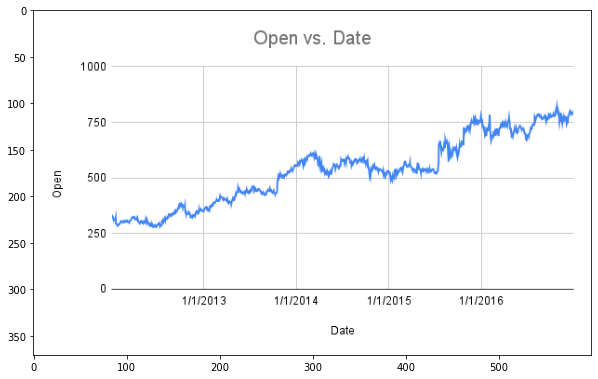

In [4]:
from matplotlib import image
view = image.imread('Google5year.png')
fig, ax = plt.subplots(1,1, figsize=(10,10))
ax.imshow(view)

**This chart was made in google sheets**

#### Feature Scaling

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
#This scaler is the best for RNN

#### We need previous 60 days of data for each predition. This is equivalent to around 3 months of data

In [13]:
#at each time t, we will look at the 60 previous days and make a prediction for time t+1
X_train = []
y_train = []
for i in range(60, 1258): #we can only start training at the 60th day, so we will do this starting at 60 till the end
    X_train.append(training_set_scaled[i-60:i, 0]) #we want the 60 previous stock prices, before the ith day
    y_train.append(training_set_scaled[i, 0])      #the price at the ith day
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train

array([[0.08581368, 0.09701243, 0.09433366, ..., 0.07846566, 0.08034452,
        0.08497656],
       [0.09701243, 0.09433366, 0.09156187, ..., 0.08034452, 0.08497656,
        0.08627874],
       [0.09433366, 0.09156187, 0.07984225, ..., 0.08497656, 0.08627874,
        0.08471612],
       ...,
       [0.92106928, 0.92438053, 0.93048218, ..., 0.95475854, 0.95204256,
        0.95163331],
       [0.92438053, 0.93048218, 0.9299055 , ..., 0.95204256, 0.95163331,
        0.95725128],
       [0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041]])

In [15]:
X_train.shape

(1198, 60)

### Reshaping

In [16]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [18]:
X_train.shape # we do this so we can add more dimensions to the dataset if we wanted to. We will only use open price data, but we can add close, volume etc

(1198, 60, 1)

**We can make a RNN contain more than one input, we just need to chnage the above cell to have 2 for the last argument**

In [19]:
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

**We need to reshape because Neural Networks need arrays**

### Building and Training the RNN

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

#### Initialising the RNN

In [22]:
regressor = Sequential()

#### Adding the first LSTM layer and some Dropout regularization. Dropout regularization prevents overfitting at each step

In [23]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
#units is the neurons
#input shape is 60 since we are keeping track of 3 months of data
#return_sequences is true since we are bulding a stacked LSTM, this just tells the RNN we are adding another LSTM

#### Adding a second LSTM layer and some Dropout regularization

In [24]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
#dropout will be the percentage of neurons we ignore

#### Adding a third LSTM layer and some Dropout regularization

In [25]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

#### Adding a fourth LSTM layer and some Dropout regularization

In [26]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

#### Adding the output layer

In [27]:
regressor.add(Dense(units = 1))

#### Compiling the RNN

In [28]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
#adam is typically the best, but check keras documentation for more specific information

#### Fitting the RNN to the Training set

In [29]:
regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
38/38 [==============================] - 7s 57ms/step - loss: 0.0400
Epoch 2/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0071
Epoch 3/50
38/38 [==============================] - 2s 51ms/step - loss: 0.0057
Epoch 4/50
38/38 [==============================] - 2s 50ms/step - loss: 0.0052
Epoch 5/50
38/38 [==============================] - 2s 52ms/step - loss: 0.0055
Epoch 6/50
38/38 [==============================] - 2s 54ms/step - loss: 0.0046
Epoch 7/50
38/38 [==============================] - 2s 57ms/step - loss: 0.0048
Epoch 8/50
38/38 [==============================] - 2s 58ms/step - loss: 0.0046
Epoch 9/50
38/38 [==============================] - 2s 58ms/step - loss: 0.0046
Epoch 10/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0042
Epoch 11/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0043
Epoch 12/50
38/38 [==============================] - 2s 55ms/step - loss: 0.0044
Epoch 13/50
38/38 [==================

#### Making predictions

#### Getting the real stock price of 2017

In [31]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

### Getting the predicted stock price of 2017

In [32]:
dataset_total = pd.concat((train['Open'], test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(test) - 60:].values #We need the last 60 days and we want to exclude the test data
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80): # we want to predict the next month of data so we use 60 - 80
    X_test.append(inputs[i-60:i, 0]) 
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

1/1 [==============================] - 1s 1s/step


#### Visualising the results

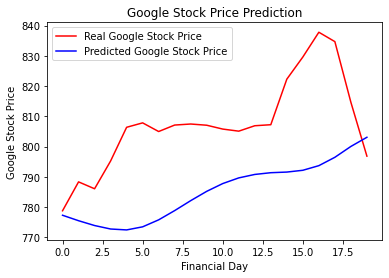

In [33]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Financial Day')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

#### Conclusion: overall, the model did not intercept the real stock price predictions much, but it was able to capture the overall trend pretty well